In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import crc32c as crc


Range Partitioning
2. The distribution is not uniform.
3. Range Partitioning is a good idea if most of the queries started with something in the range [c, n] since that's the most uniformly distributed area

Consistent Hashing
4. The distribution is uniform.
5. Consistent hashing is a good idea if the queries are evenly distributed across the whole range of buckets
6. About 90725 objects would be reshuffled
7. With consistent hashing you can expect K/n * N keys to be moved, where N is the number of additional nodes.  This is different from standard hash tables since standard hash tables would require all keys to be shuffled every time any number of nodes were added.
8. MongoDB implements range partitioning.
9. Riak, Cassandra, and Voldemort all implement consistent hashing.

In [14]:
words = open("words.txt").readlines()

In [21]:
print len(words)
words = [x.lower() for x in words]
print words[:50]
buckets = [[] for x in range(26)]
print buckets

for word in words:
    bucket = ord(word[0])-97
    buckets[bucket].append(word)
    
entries = [len(bucket) for bucket in buckets]

235886
['a\n', 'a\n', 'aa\n', 'aal\n', 'aalii\n', 'aam\n', 'aani\n', 'aardvark\n', 'aardwolf\n', 'aaron\n', 'aaronic\n', 'aaronical\n', 'aaronite\n', 'aaronitic\n', 'aaru\n', 'ab\n', 'aba\n', 'ababdeh\n', 'ababua\n', 'abac\n', 'abaca\n', 'abacate\n', 'abacay\n', 'abacinate\n', 'abacination\n', 'abaciscus\n', 'abacist\n', 'aback\n', 'abactinal\n', 'abactinally\n', 'abaction\n', 'abactor\n', 'abaculus\n', 'abacus\n', 'abadite\n', 'abaff\n', 'abaft\n', 'abaisance\n', 'abaiser\n', 'abaissed\n', 'abalienate\n', 'abalienation\n', 'abalone\n', 'abama\n', 'abampere\n', 'abandon\n', 'abandonable\n', 'abandoned\n', 'abandonedly\n', 'abandonee\n']
[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


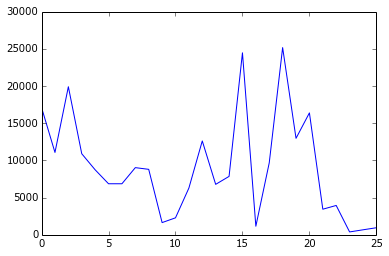

In [31]:
plt.plot(entries)
plt.show()

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


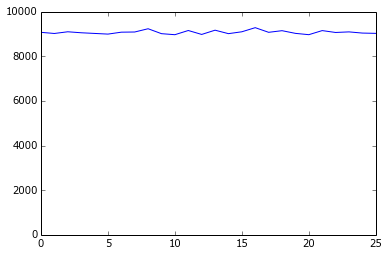

In [61]:
hashed_buckets = [[] for x in range(26)]
print hashed_buckets

for word in words:
    bucket_width = pow(2,32)/26
    bucket = crc.crc(word)/bucket_width
    hashed_buckets[bucket].append(word)
    
hashed_entries = [len(bucket) for bucket in hashed_buckets]
plt.plot(hashed_entries)
plt.axis([0,25,0,10000])
plt.show()

In [72]:
print 10*len(words)/26

90725
